<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Adaline_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptive linear neuron (Adaline) - gradient descent - exmple - Ibrahim 22.08.2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [ ]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
x = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)
print(y)
print(len(x))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
100


In [ ]:
class adaline(object):
  def __init__(self, epochs=100, eta=0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels):
    x = training_inputs
    t = training_labels
    self.cost = []   # to plot cost function over epochs
    self.w = random.rand(training_inputs.ndim+1)
    for i in range(self.epochs):
      net = np.dot(x, self.w[1:])+self.w[0]
      y = net  #linear activation function
      error = (t - y)   # this is vector
      #update weights using sum of gradients
      self.w[1:] += self.eta *  (np.dot(error, x)).mean()
      self.w[0] += self.eta * error.mean()
      cost = 0.5 * (error**2).sum()
      self.cost.append(cost)
    return self
  
  def predict(self, inputs):
    net=np.dot(inputs, self.w[1:])+self.w[0]
    return(np.where(net>=0, 1, -1)) 

[1542.833262014647, 620.6437802986029, 251.35446832121173, 103.47314170497259, 44.2542873844242, 20.54017775852797, 11.043886147413653, 7.24109693557857, 5.718261619498392, 5.108430180954447]
[ 0.10925172  0.31222573 -0.63278559]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Error = 0.00 %


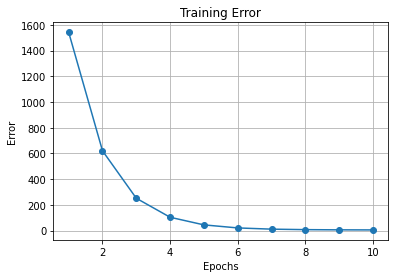

In [9]:
model=adaline(epochs=10, eta=0.0001)
model.train(x, y)
predictions = model.predict(x)

print(model.cost)
print(model.w)

print(predictions)

pred_error = sum(y - predictions)/len(y)*100
print('Error = %2.2f %%'  %pred_error)

plt.plot(range(1,len(model.cost)+1), model.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

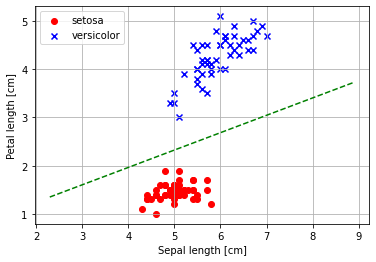

In [ ]:
# scatter plot of predictions
plt.scatter(x[predictions==1,0], x[predictions==1,1], color='red', marker='o', label='setosa')
plt.scatter(x[predictions==-1,0], x[predictions==-1,1], color='blue', marker='x', label='versicolor')
# decsion line
xx1 = np.arange(x[:,0].min()-2, x[:,0].max()+2, 0.1)
xx2 = -model.w[1]/model.w[2] * xx1 - model.w[0]/model.w[2]
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

[5.471 2.862]
[0.63848179 1.44130358]


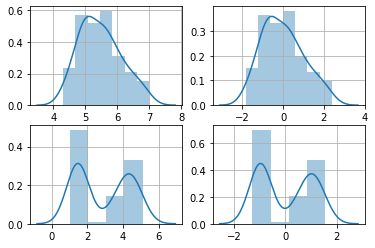

In [ ]:
# visualization distribution of the feature inputs
xn = (x-x.mean(axis=0))/x.std(axis=0)
print(x.mean(axis=0))
print(x.std(axis=0))
#print([x, xn])
fig, axs = plt.subplots(2, 2)
sns.distplot(x[:,0],ax=axs[0,0]);
axs[0,0].grid()
sns.distplot(xn[:,0],ax=axs[0,1]);
axs[0,1].grid()
sns.distplot(x[:,1],ax=axs[1,0]);
axs[1,0].grid()
sns.distplot(xn[:,1],ax=axs[1,1]);
axs[1,1].grid()

Error = 0.00 %


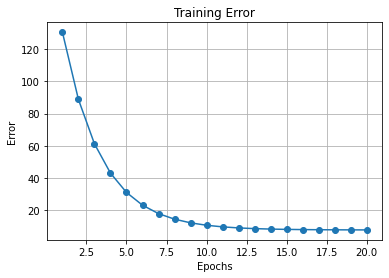

In [10]:
# test training with scaled features
model1=adaline(epochs=20, eta=0.01)
model1.train(xn, y)
predictions = model.predict(x)
pred_error = sum(y - predictions)/len(y)*100
print('Error = %2.2f %%'  %pred_error)


plt.plot(range(1,len(model1.cost)+1), model1.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()